Aluno: Adriel Ferreira Trajano \\
Matrícula: 20220071160

In [3]:
from sympy import *
from sympy import limit_seq,limit, symbols, S,Sum, oo
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [4]:
n = symbols('n')

# Questão 1

## Funções

In [5]:
# função que retorna valor da sequencia {a_n}
def f(k,termo_geral):
  return termo_geral.subs(n,k)

In [55]:
def tabela(termo_geral,k_min, k_max):

  tabela = []
  S_k = 0

  for k in range(k_min, k_max+1):
    a_k = f(k,termo_geral)
    S_k += a_k
    tabela.append([k,a_k,S_k])

  return tabela

In [7]:
def print_table(a_n,k_min, k_max):
  tab = tabela(a_n, k_min, k_max)
  table = PrettyTable()
  table.field_names = ["k", "a(k)", "S(k)"]
  for linha in tab:
      table.add_row(linha)
  print(table)

In [8]:
def plotagem(tabela):
  k_valores = [linha[0] for linha in tabela]
  a_valores = [linha[1] for linha in tabela]
  S_valores = [linha[2] for linha in tabela]

  plt.plot(k_valores, a_valores, label='a(k)', color = 'orange', marker='o')
  plt.plot(k_valores, S_valores, label = 'S_k', color = 'purple', marker='o')
  plt.xlabel('[k_min,k_max]')
  plt.title('Gráfico de a(k) e S(k)')
  plt.legend()
  plt.show()


In [9]:
def plotagem_plus(tabela,S,tolerancia):

  k_valores = [linha[0] for linha in tabela]
  a_valores = [linha[1] for linha in tabela]
  S_valores = [linha[2] for linha in tabela]

  plt.plot(k_valores, a_valores, label='a(k)', color = 'orange', marker='o')
  plt.plot(k_valores, S_valores, label = 'S_k', color = 'purple', marker='o')

  plt.axhline(S + tolerancia, label= f'S+ϵ = {S+tolerancia}', color='green', linestyle='--', linewidth=3)
  plt.axhline(S, label= f'S = {S}', color='blue', linestyle='-', linewidth=1.5)
  plt.axhline(S - tolerancia, label= f'S-ϵ = {S-tolerancia}', color='red', linestyle=':', linewidth=2)

  plt.xlabel('[k_min,k_max]')
  plt.legend()
  plt.show()


In [10]:
def opcao_a(a_n,S, k_min, k_max,  tolerancia):
  tab = tabela(a_n,k_min, k_max)
  valor_S_k = tab[-1][2]

  if abs(valor_S_k - S) <= tolerancia:
    res_plotagem_plus = plotagem_plus(tab, S, tolerancia)

    table = print_table(a_n,k_min, k_max)

    return table, res_plotagem_plus
  else:
    print('A condição |S(k) − S| ≤ ϵ não é satisfeita')


In [11]:
def opcao_b(a_n, k_min, k_max):

  tab = tabela(a_n,k_min, k_max)
  res_plotagem = plotagem(tab)
  table = print_table(a_n,k_min, k_max)

  return table, res_plotagem

## Testes

* Valores que vamos utilizar

In [12]:
k_min = 8
k_max = k_min + 20
tolerancia = 10**(-3) #valor arbitrario
termo_i = (1/4**(n-5)) #sei que a série é convergente. exemplo do livro
termo_ii = 1/10**n #n sei se é convergente
serie_i = Sum(termo_i, (n, k_min, oo))
S_i = serie_i.doit().evalf() # lim S_k = S

$i)\ a_n = \frac{1}{4^{n-5}}\\
ii)\ a_n = \frac{1}{10^{n}}$


* Escolher opção

**Opção a)**

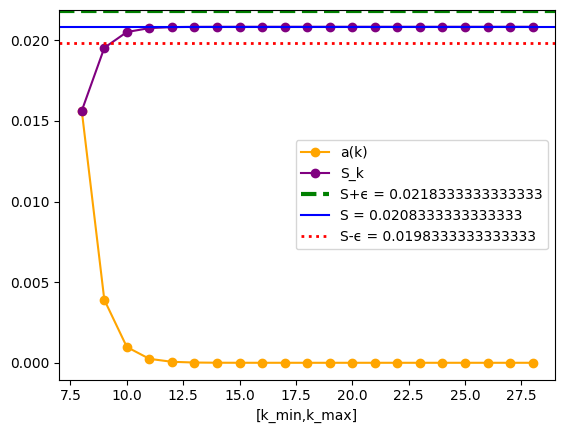

+----+------------------+------------------------------+
| k  |       a(k)       |             S(k)             |
+----+------------------+------------------------------+
| 8  |       1/64       |             1/64             |
| 9  |      1/256       |            5/256             |
| 10 |      1/1024      |           21/1024            |
| 11 |      1/4096      |           85/4096            |
| 12 |     1/16384      |          341/16384           |
| 13 |     1/65536      |          1365/65536          |
| 14 |     1/262144     |         5461/262144          |
| 15 |    1/1048576     |        21845/1048576         |
| 16 |    1/4194304     |        87381/4194304         |
| 17 |    1/16777216    |       349525/16777216        |
| 18 |    1/67108864    |       1398101/67108864       |
| 19 |   1/268435456    |      5592405/268435456       |
| 20 |   1/1073741824   |     22369621/1073741824      |
| 21 |   1/4294967296   |     89478485/4294967296      |
| 22 |  1/17179869184   |    35

(None, None)

In [15]:
opcao_a(termo_i, S_i, k_min, k_max, tolerancia)

**Opção b)**

In [16]:
k_min_b, k_max_b = 3, 23

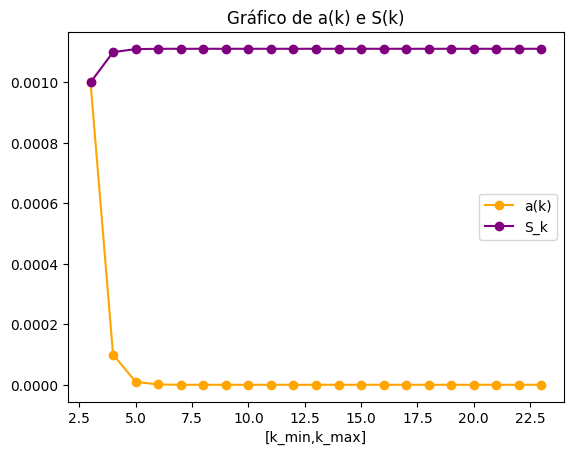

+----+----------------------------+------------------------------------------------+
| k  |            a(k)            |                      S(k)                      |
+----+----------------------------+------------------------------------------------+
| 3  |           1/1000           |                     1/1000                     |
| 4  |          1/10000           |                    11/10000                    |
| 5  |          1/100000          |                   111/100000                   |
| 6  |         1/1000000          |                  1111/1000000                  |
| 7  |         1/10000000         |                 11111/10000000                 |
| 8  |        1/100000000         |                111111/100000000                |
| 9  |        1/1000000000        |               1111111/1000000000               |
| 10 |       1/10000000000        |              11111111/10000000000              |
| 11 |       1/100000000000       |             111111111/1000000

(None, None)

In [17]:
opcao_b(termo_ii,k_min_b,k_max_b)

# Questão 2

Exiba uma saída do programa do Exercício 1 de acordo com o caso da série ser convergente ou divergente. Informe os valores de k_min e k_max utilizados no programa e, se for o caso, os valores de S e de ϵ também.

* letra a) série harmônica


$\sum_{n=1}^{∞} \frac{1}{n}$

In [20]:
k_min_q2 = 1
k_max_q2 = k_min_q2 + 20
tolerancia_q2 = 10**(-3) #valor arbitrario
termo_q2 = (1/n)

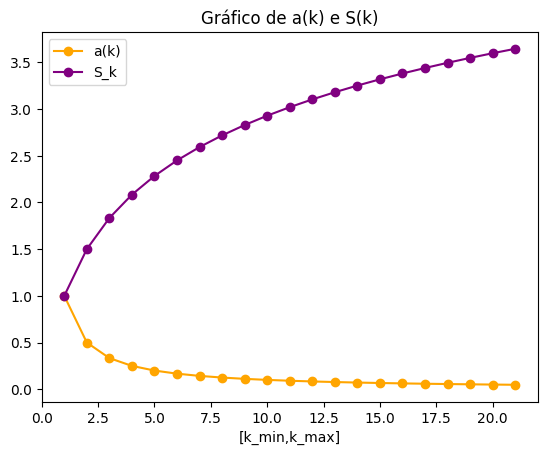

+----+------+--------------------+
| k  | a(k) |        S(k)        |
+----+------+--------------------+
| 1  |  1   |         1          |
| 2  | 1/2  |        3/2         |
| 3  | 1/3  |        11/6        |
| 4  | 1/4  |       25/12        |
| 5  | 1/5  |       137/60       |
| 6  | 1/6  |       49/20        |
| 7  | 1/7  |      363/140       |
| 8  | 1/8  |      761/280       |
| 9  | 1/9  |     7129/2520      |
| 10 | 1/10 |     7381/2520      |
| 11 | 1/11 |    83711/27720     |
| 12 | 1/12 |    86021/27720     |
| 13 | 1/13 |   1145993/360360   |
| 14 | 1/14 |   1171733/360360   |
| 15 | 1/15 |   1195757/360360   |
| 16 | 1/16 |   2436559/720720   |
| 17 | 1/17 | 42142223/12252240  |
| 18 | 1/18 |  14274301/4084080  |
| 19 | 1/19 | 275295799/77597520 |
| 20 | 1/20 | 55835135/15519504  |
| 21 | 1/21 |  18858053/5173168  |
+----+------+--------------------+


(None, None)

In [21]:
# Não sabemos se a série é convergente
opcao_b(termo_q2,k_min_q2 ,k_max_q2)

# Questão 4

* letra c) $\sum_{n=1}^{∞} \frac{n^3}{n^{3}+n^{2}+4}$

In [22]:
k_min_q4 = 5
k_max_q4 = k_min_q4 + 20
tolerancia_q4 = 10**(-3) #valor arbitrario
termo_q4 = (pow(n,3)/(pow(n,3)+pow(n,2)+4))

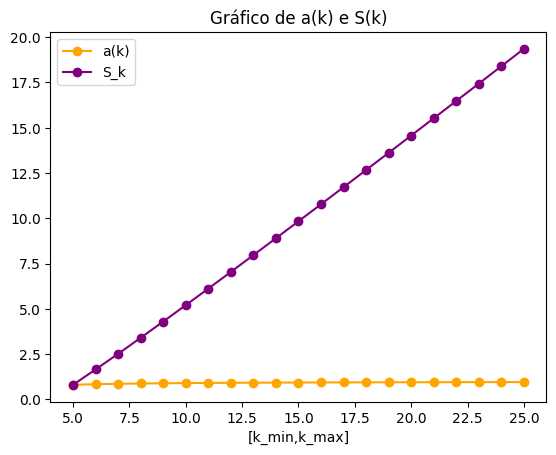

+----+-------------+------------------------------------------------------------------------+
| k  |     a(k)    |                                  S(k)                                  |
+----+-------------+------------------------------------------------------------------------+
| 5  |   125/154   |                                125/154                                 |
| 6  |    27/32    |                               4079/2464                                |
| 7  |   343/396   |                              55919/22176                               |
| 8  |   128/145   |                            10946783/3215520                            |
| 9  |   729/814   |                          511581611/118974240                           |
| 10 |   125/138   |                         14245007053/2736407520                         |
| 11 |  1331/1456  |                        217704363199/35573297760                        |
| 12 |   432/469   |                      16781572996093/238

(None, None)

In [23]:
opcao_b(termo_q4, k_min_q4, k_max_q4)

Nota-se pelo gráfico que a série não converge.

## Questão 5

In [40]:
termo_q5 = 4/(4*n**2 + 4*n -3)

In [41]:
serie_q5 = Sum(termo_q5, (n, 2, oo))
S_q5 = 8/15 #calculado analitacamente

In [45]:
serie_q5

Sum(4/(4*n**2 + 4*n - 3), (n, 2, oo))

In [42]:
k_min_q5 = 2
k_max_q5 = k_min_q5 + 20

In [53]:
tolerancia_q5 = 10**(-1)

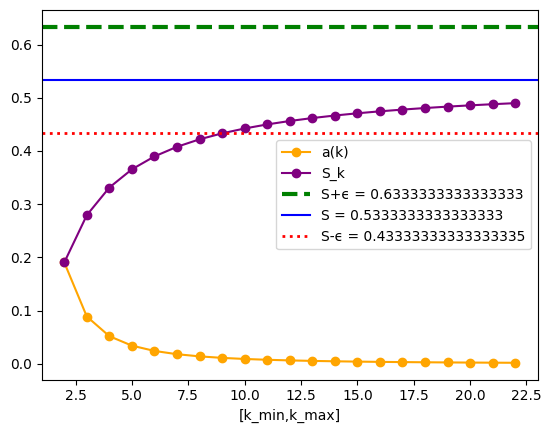

+----+--------+-------------+
| k  |  a(k)  |     S(k)    |
+----+--------+-------------+
| 2  |  4/21  |     4/21    |
| 3  |  4/45  |    88/315   |
| 4  |  4/77  |   164/495   |
| 5  | 4/117  |   784/2145  |
| 6  | 4/165  |    76/195   |
| 7  | 4/221  |   104/255   |
| 8  | 4/285  |  2044/4845  |
| 9  | 4/357  |   288/665   |
| 10 | 4/437  |   356/805   |
| 11 | 4/525  |   776/1725  |
| 12 | 4/621  |   308/675   |
| 13 | 4/725  |  1808/3915  |
| 14 | 4/837  |  6292/13485 |
| 15 | 4/957  |  2408/5115  |
| 16 | 4/1085 |   548/1155  |
| 17 | 4/1221 |  1856/3885  |
| 18 | 4/1365 |  1156/2405  |
| 19 | 4/1517 |  1288/2665  |
| 20 | 4/1677 | 12844/26445 |
| 21 | 4/1845 |   944/1935  |
| 22 | 4/2021 |  1036/2115  |
+----+--------+-------------+


(None, None)

In [56]:
opcao_a(termo_q5, S_q5, k_min_q5, k_max_q5, tolerancia_q5)